In [34]:
include("../src/include_file.jl");

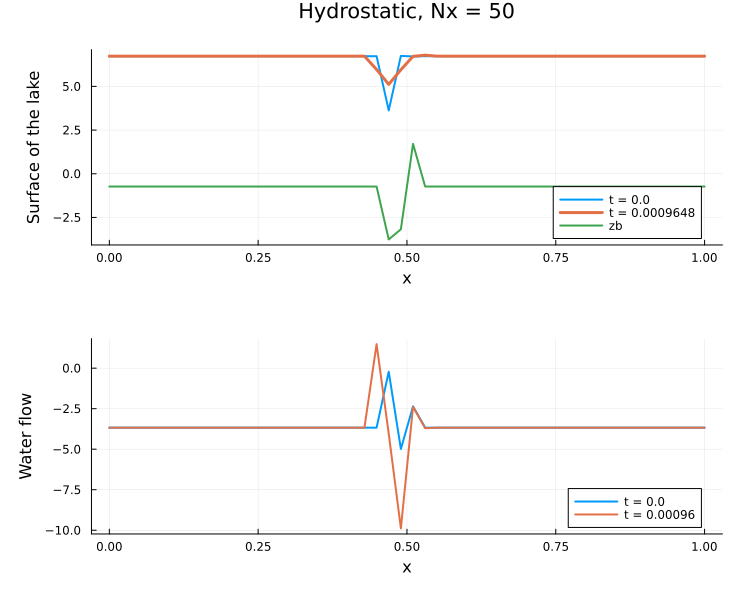

nothing

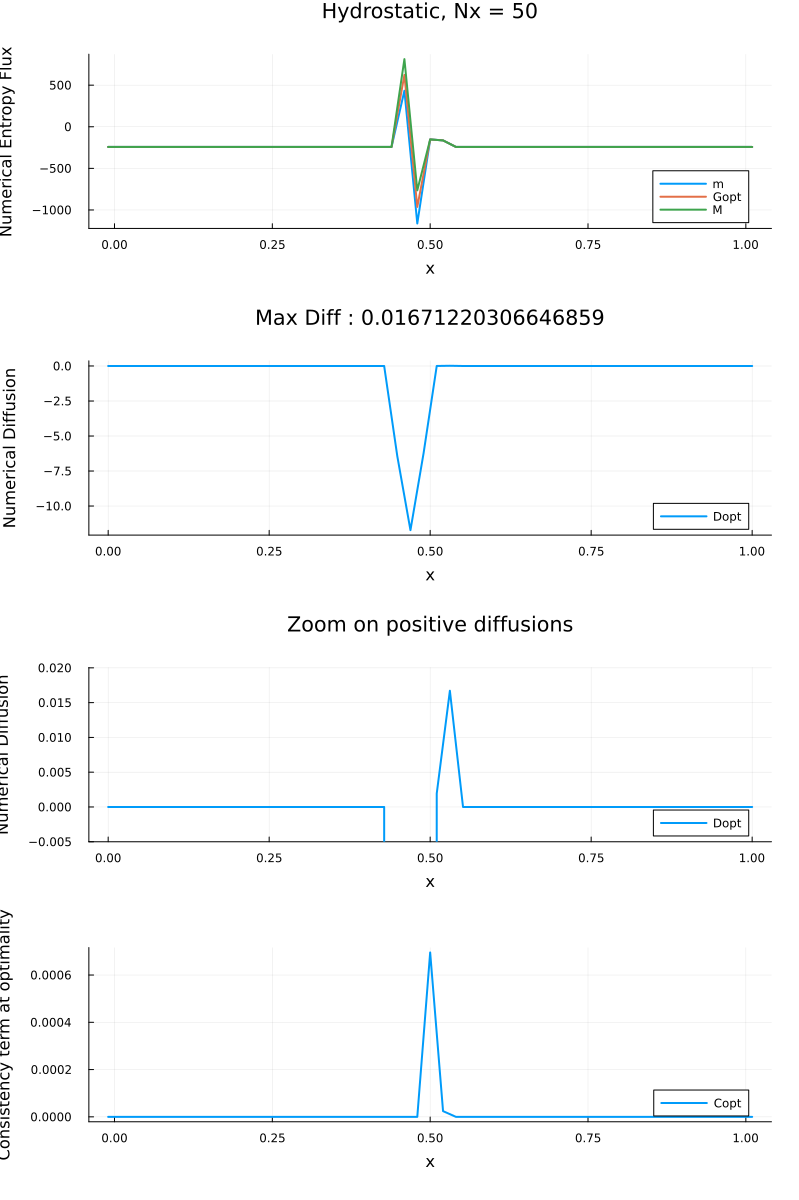

sol.worstLowDiffVec = [-0.7731136292450742]
rw.domain.Nx = 50
[-0.7731136292450742]
Maximal diffusion value : 0.01671220306646859
sol.worstLowDiffVec = [-0.7698959993224719]
rw.domain.Nx = 50
[-0.7698959993224719]
Maximal diffusion value : 0.020082790605593814
sol.worstLowDiffVec = [-0.7790600510826948]
rw.domain.Nx = 50
[-0.7790600510826948]
Maximal diffusion value : 0.01958626578871181
sol.worstLowDiffVec = [-0.780745274237006]
rw.domain.Nx = 50
[-0.780745274237006]
Maximal diffusion value : 0.020819702851966326
sol.worstLowDiffVec = [-0.7835748361078743]
rw.domain.Nx = 50
[-0.7835748361078743]
Maximal diffusion value : 0.017021251078660704


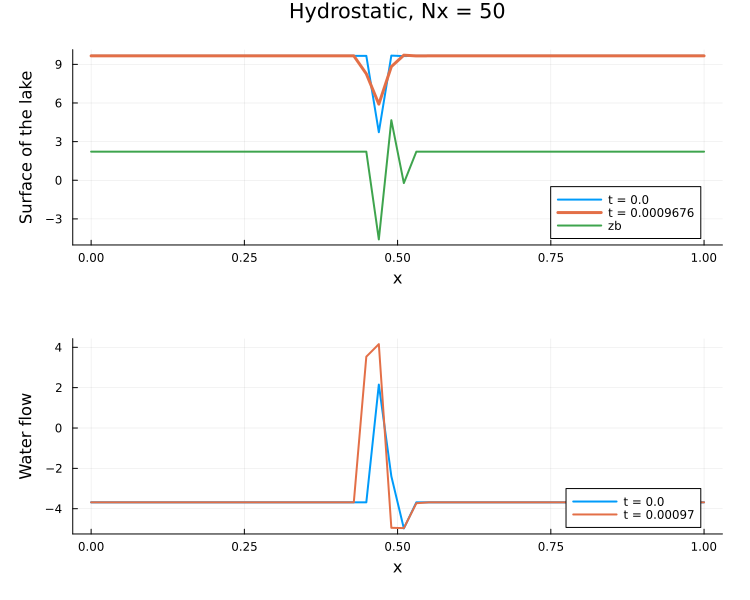

nothing

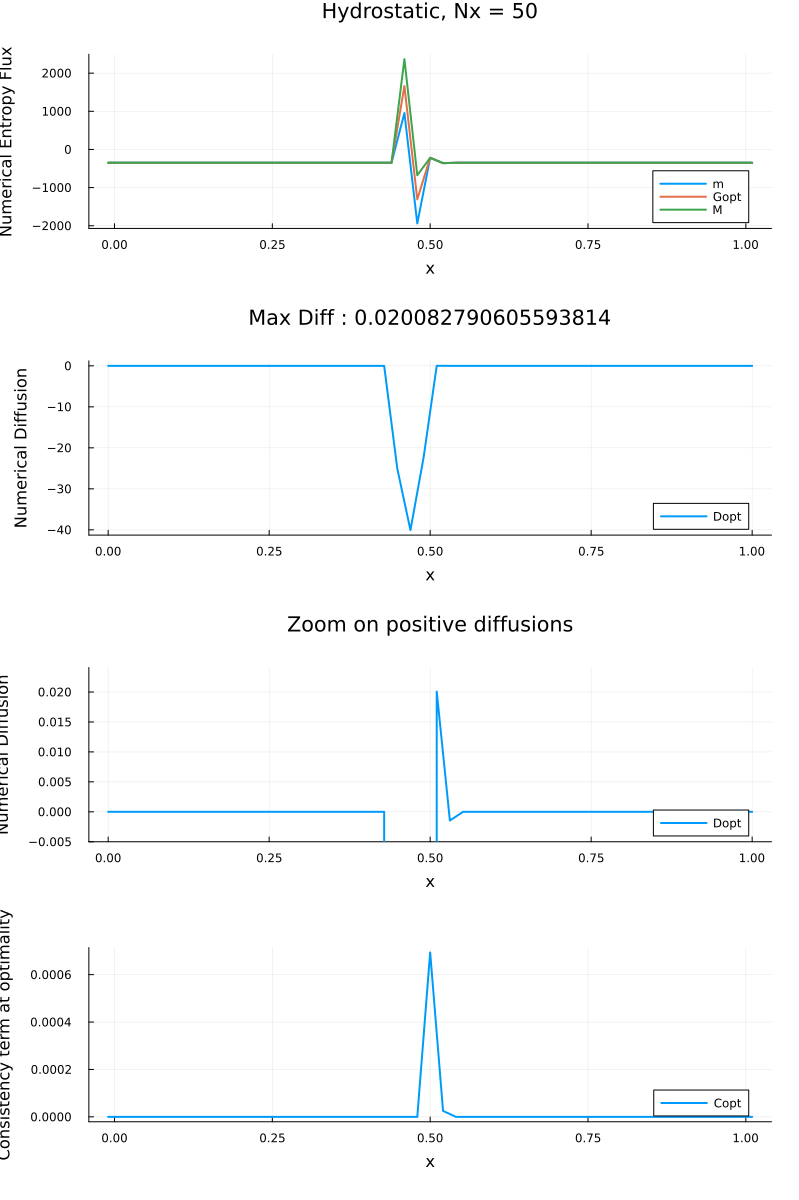

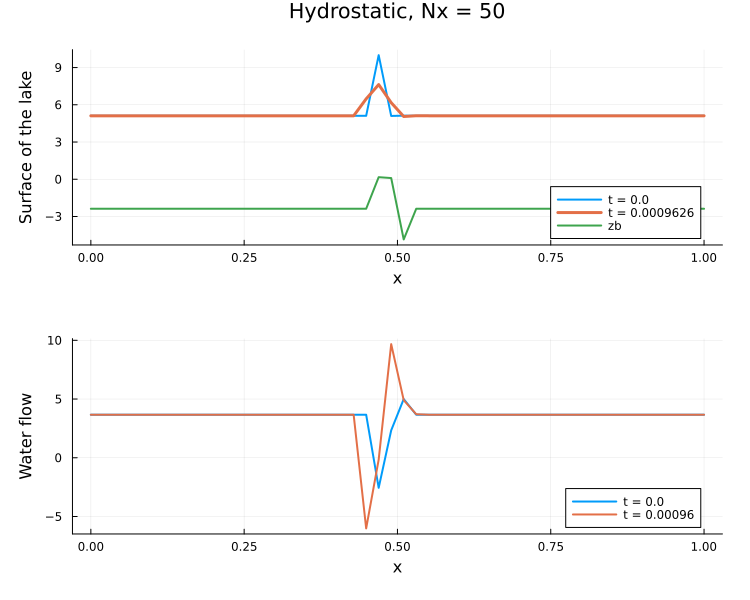

nothing

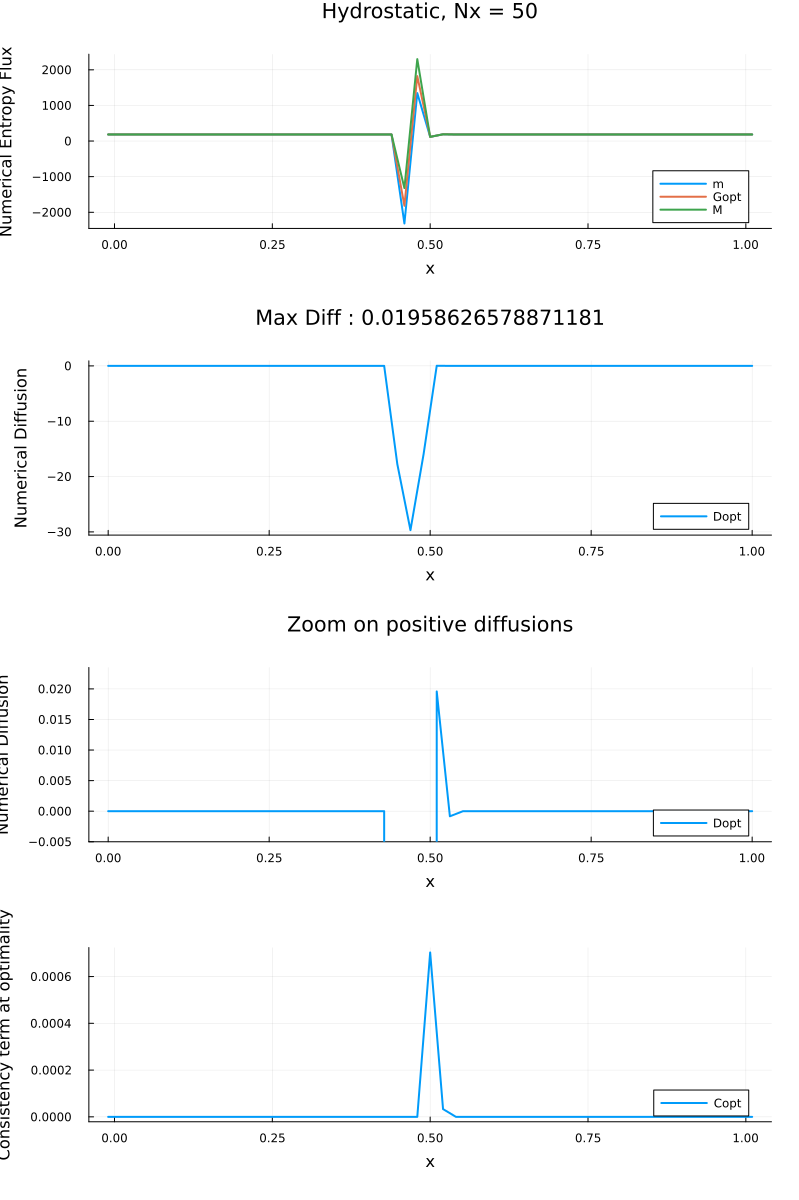

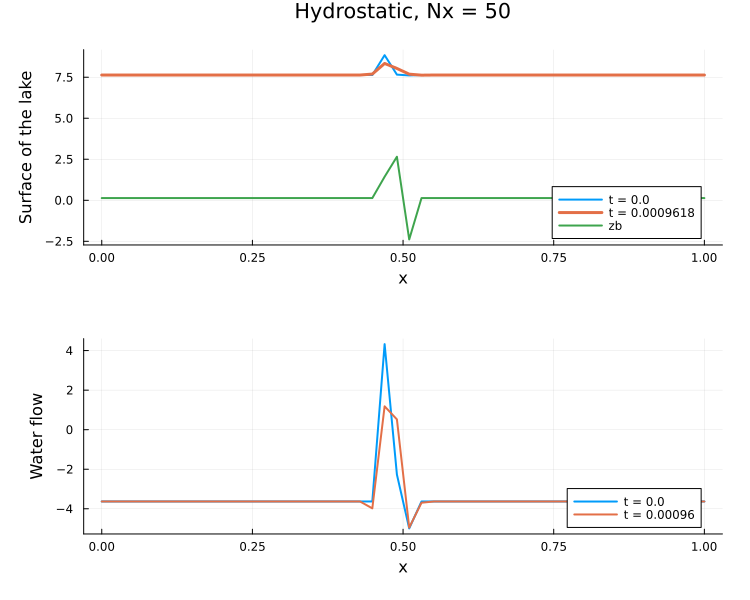

nothing

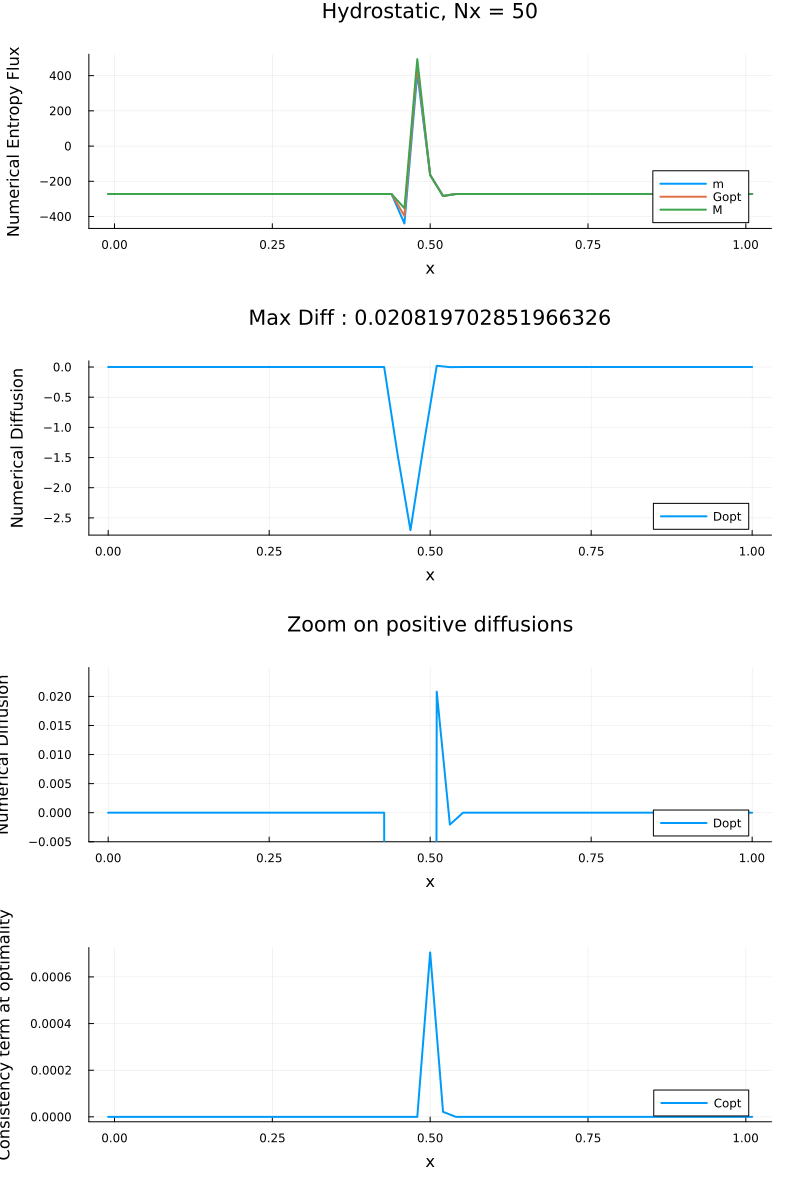

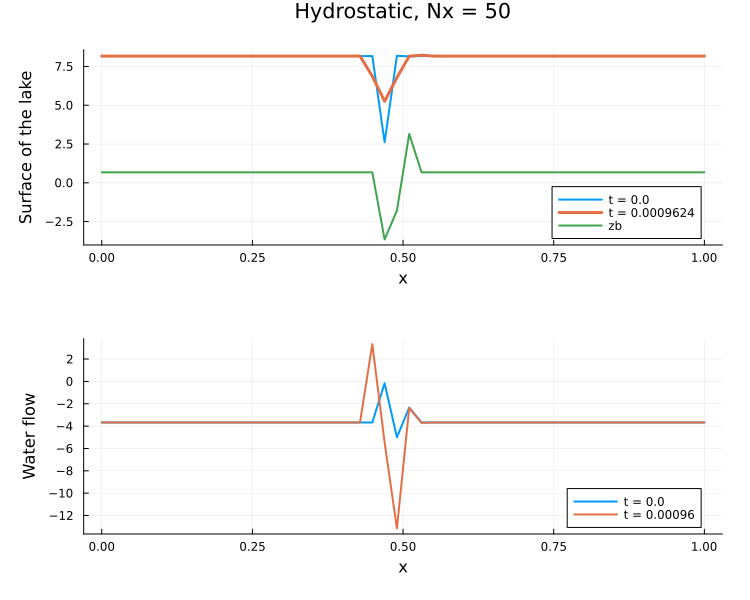

nothing

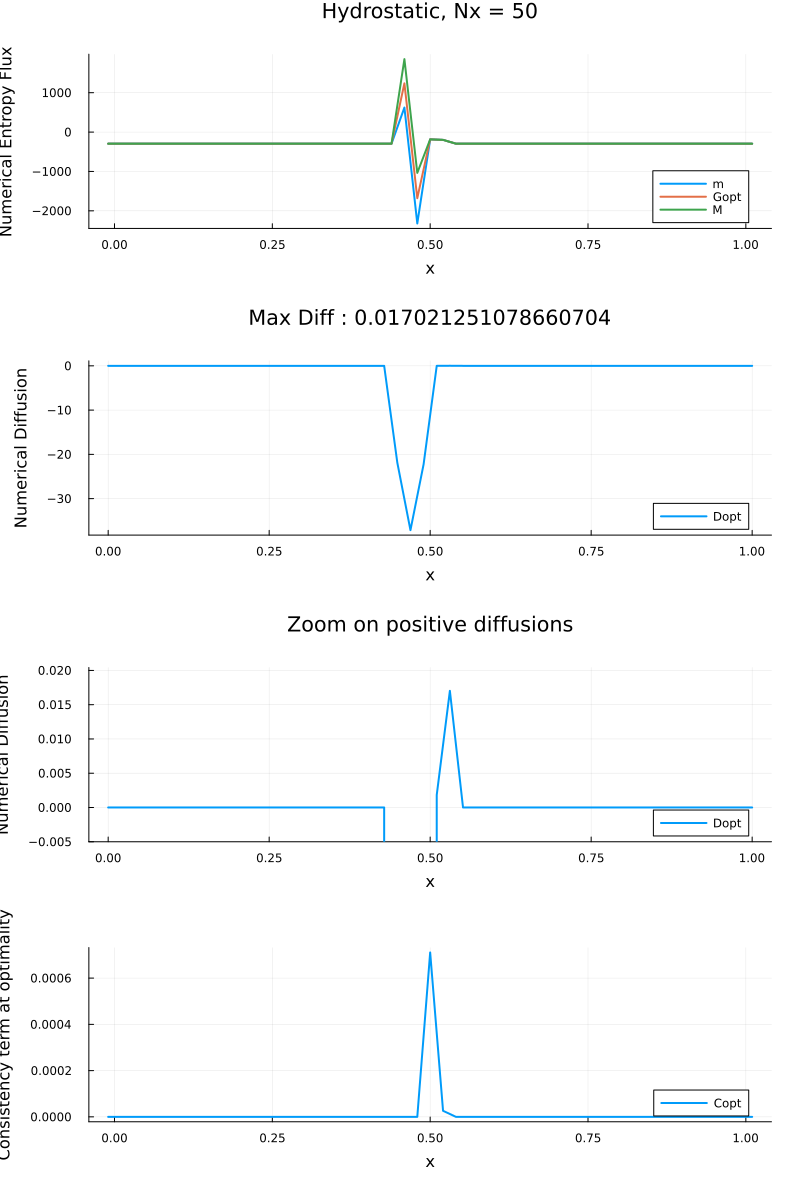

In [37]:
Nx = 50
xmin, xmax = 0.0, 1.0
CFL_factor = 0.5
equation = SaintVenant(flat_zb(height=0.0), 1e-10)
method = createHydrostatic(CFL_factor, Rusanov)
boxBounds=[5.0 10;-5.0 5.0]
sourceBounds=[-5.0, 5.0]
nb_repetitions = 5

for k in 1:nb_repetitions
    sol = iterate_WID(xmin, xmax, Nx, equation, method; nb_it=1, boxBounds=boxBounds, sourceBounds=sourceBounds)
    @show sol.worstLowDiffVec
    u, domain = correct_extend_initial_data(sol)
    dx = domain.dx
    dt = method.CFL_factor * dx / CFL_cond(equation, u)
    domain.Tf = dt

    fv_sol_test = fv_solve(domain, u, equation, method)
    display(plot_fv_sol(fv_sol_test, equation, nb_plots=2))
    solEnt_test = optimize_for_entropy(u, domain, equation, method)
    plot_solution_EntBreak(solEnt_test)
    #display(plot(solEnt_test.domain.interfaces, solEnt_test.Copt, label="Copt"))
end